# Proyecto 10

## Importacion de librerias

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


## Lectura de DataFrames

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [6]:
data[data.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [7]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [8]:
data=data.fillna(0)

In [9]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Preparacion de datos

In [10]:
data[~((data['Exited']==1)|(data['Exited']==0))]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


### Cambio de etiquetas

Aqui realizamos un cambio de etiquetas para los valores categoricos y pasarlo a valores numericos, para que nuestro modelo pueda trabajar mejor

In [11]:
enconder = OrdinalEncoder()
data_ordinal = pd.DataFrame(enconder.fit_transform(data), columns=data.columns)


### Separacion de datos de entrenamiento y de validación

In [12]:
featured = data_ordinal.drop(['Exited'], axis=1)
target = data_ordinal['Exited']


In [13]:
featured_train, featured_valid, target_train, target_valid = train_test_split(featured, target,random_state=12345, test_size=0.25)

## Creacion de Modelo

In [14]:
model = RandomForestClassifier(random_state=12345, n_estimators=100, max_depth=15)

In [15]:
model.fit(featured_train,target_train)

RandomForestClassifier(max_depth=15, random_state=12345)

In [16]:
predicted_valid = model.predict(featured_valid)

In [17]:
f1_score(target_valid, predicted_valid)

0.5308641975308642

EL valor es menor que 0.59 debemos de escalarlo, y realizar modificaciones para mejor este resultado.

## Modificación de base de datos

### Sobremuestreo

In [18]:
target_train[target_train==1].count()


1502

In [19]:
target_train[target_train==0].count()


5998

In [20]:
def upsample(featured,target,repeat):
    features_zeros = featured[target==0]
    features_ones = featured[target==1]
    target_zeros = target[target==0]
    target_ones = target[target==1]
    
    features_upsampled = pd.concat([features_zeros]+[features_ones]*repeat)
    target_upsampled = pd.concat([target_zeros]+[target_ones]*repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

In [21]:
featured_upsampled, target_upsampled = upsample(featured_train, target_train,5)

In [22]:
model.fit(featured_upsampled,target_upsampled)

RandomForestClassifier(max_depth=15, random_state=12345)

In [23]:
predicted_valid = model.predict(featured_valid)

In [24]:
f1_score(target_valid, predicted_valid)

0.6072144288577155

### Submuestreo

No veo la utilidad de utilizar el submuestreo

In [25]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled

In [26]:
#features_downsampled, target_downsampled = downsample(featured_upsampled, target_upsampled,0.5)

In [27]:
#model.fit(features_downsampled,target_downsampled)

In [28]:
#predicted_valid = model.predict(featured_valid)

In [29]:
#f1_score(target_valid, predicted_valid)

## Curva ROC

In [30]:
probabilities_valid = model.predict_proba(featured_valid)
probabilities_one_valid = probabilities_valid[:,1]

In [31]:
auc_roc = roc_auc_score(target_valid,probabilities_one_valid)

In [32]:
auc_roc

0.853605859551497

In [33]:
fpr, tpr, thresholds = roc_curve(target_valid,probabilities_one_valid)

### Grafica ROC

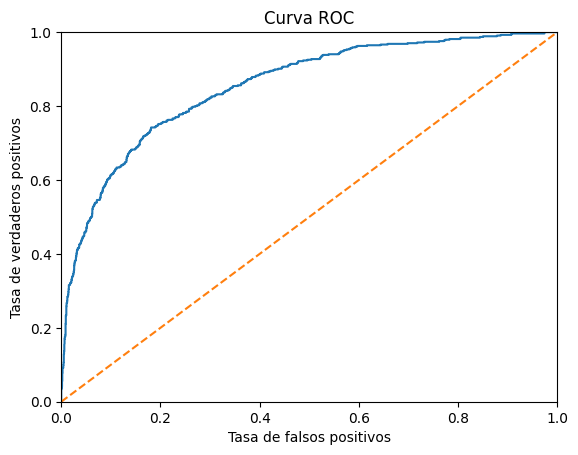

In [34]:
plt.figure()

# < traza la gráfica >

# Curva ROC para modelo aleatorio (parece una línea recta)
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
# < utiliza las funciones plt.xlim() y plt.ylim() para
#   establecer el límite para los ejes de 0 a 1 >
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
# < utiliza las funciones plt.xlabel() y plt.ylabel() para
#   nombrar los ejes "Tasa de falsos positivos" y "Tasa de verdaderos positivos">
plt.title('Curva ROC')
# < agrega el encabezado "Curva ROC" con la función plt.title() >

plt.show()